In [1]:
# Imports, as always...
from tqdm.notebook import tqdm
import numpy as np

# Script imports.
from scripts.circuits import add_random_layer, build_circuit, estimate_output_distribution

# Plotting.
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

# Styling.
sns.set_context('paper')
sns.set_theme(style='darkgrid', palette='Dark2')

# Randomness seed.
seed = 42

# Generating Circuits

To know whether our methods for learning unitaries are working, we need to get our hands on some unitaries! Concretely, we need to be able to generate quantum circuits implementing unitaries.

Using only clifford gates, and fixing the number of qubits $n(=4)$, we look to generate circuits at depth $d=O(n)$. We choose a linear scaling because it gets us beyond the "shallow circuit" claims in Huang et al. (2024), and hopefully into a more general realm of learning.

At each depth $d$, we would like to have a set of circuits such that, if we were to randomly choose any circuit in that set, the probability distribution over output states is roughly uniform (or at least not overly biased). The idea is that the challenge of learning circuits of this depth can be well exemplified by learning just this (finite) set, and our conclusions can be generalised well.

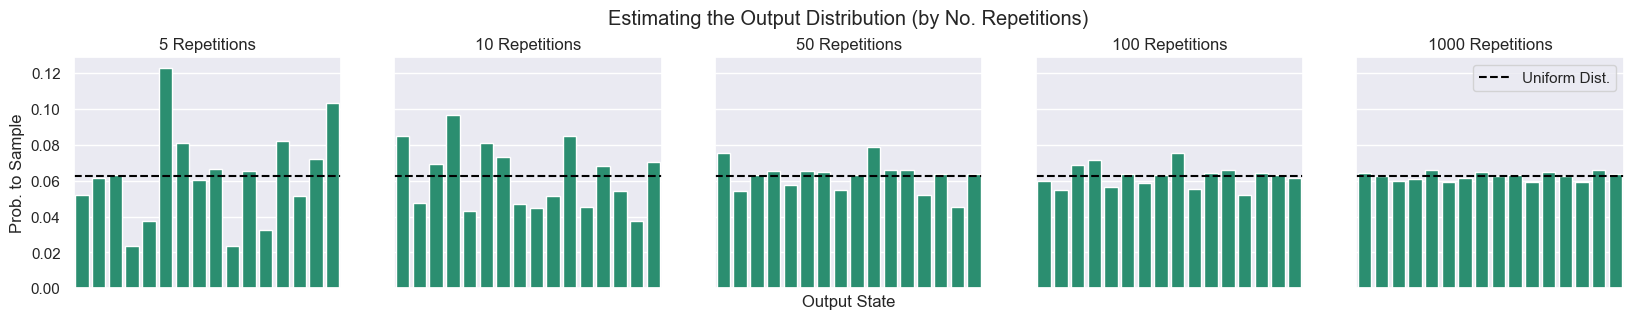

In [2]:
# What does the output distribution converge on?
reps = [5, 10, 50, 100, 1000]
fig, axes = plt.subplots(1, 5, figsize=(20, 3), sharey='row')

# Produce a circuit.
circuit = build_circuit(4, 10, seed)

# Estimate its output distribution with increasing repetitions.
for i, ax in enumerate(axes.flatten()):
    # Estimate.
    probs = estimate_output_distribution(circuit, reps[i])
    
    # Plot.
    sns.barplot(probs, ax=ax)
    ax.axhline(1/(2 ** circuit.num_qubits), color='k', linestyle='--', label='Uniform Dist.')
    
    # Beautify.
    ax.set_title(f'{reps[i]} Repetitions')
    ax.set_xticks([])
    
# More beautification.
axes[0].set_ylabel('Prob. to Sample')
axes[2].set_xlabel('Output State')
axes[-1].legend()
fig.suptitle('Estimating the Output Distribution (by No. Repetitions)', x=.512, y=1.04)
    
plt.savefig('./figures/circuit-output-dist-by-repetitions.pdf', bbox_inches='tight')

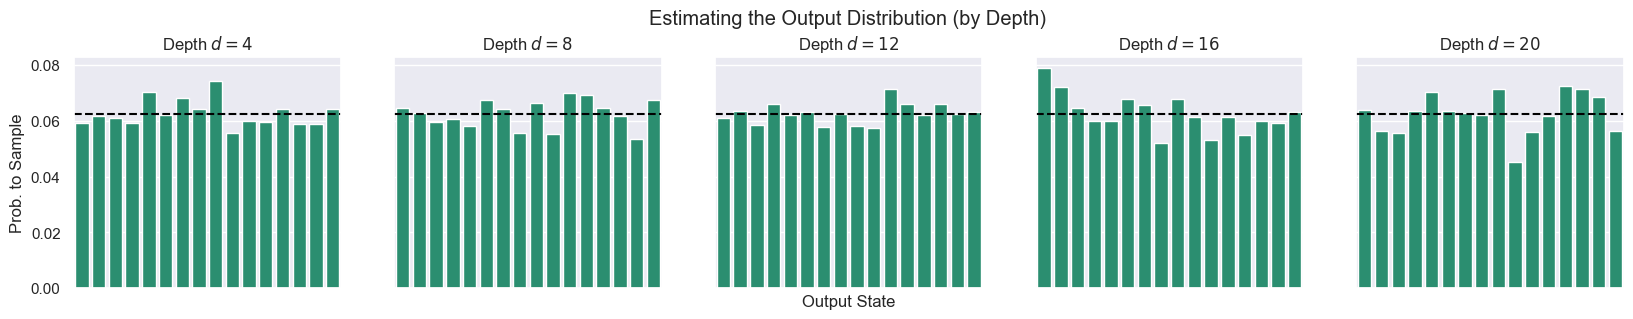

In [3]:
# Same again, but with increasing depth.
depths = [4, 8, 12, 16, 20]
fig, axes = plt.subplots(1, 5, figsize=(20, 3), sharey='row')

# Estimate its output distribution with increasing repetitions.
for i, ax in enumerate(axes.flatten()):
    # Produce a circuit.
    circuit = build_circuit(4, depths[i], seed)
    
    # Estimate.
    probs = estimate_output_distribution(circuit, 100)
    
    # Plot.
    sns.barplot(probs, ax=ax)
    ax.axhline(1/(2 ** circuit.num_qubits), color='k', linestyle='--')
    
    # Beautify.
    ax.set_title(f'Depth $d={depths[i]}$')
    ax.set_xticks([])
    
# More beautification.
axes[0].set_ylabel('Prob. to Sample')
axes[2].set_xlabel('Output State')
fig.suptitle('Estimating the Output Distribution (by Depth)', x=.512, y=1.04)

plt.savefig('./figures/circuit-output-dist-by-depth.pdf', bbox_inches='tight')